In [1]:
!pip install pycaret
from pycaret.utils import enable_colab
import pandas as pd
enable_colab()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 32.6 MB/s 
     |████████████████████████████████| 25.9 MB 86.4 MB/s 
     |████████████████████████████████| 10.4 MB 45.0 MB/s 
     |████████████████████████████████| 636 kB 82.1 MB/s 
     |████████████████████████████████| 1.7 MB 96.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 56.9 MB/s 
     |████████████████████████████████| 6.8 MB 70.7 MB/s 
     |████████████████████████████████| 17.0 MB 64.8 MB/s 
     |████████████████████████████████| 167 kB 86.5 MB/s 
     |████████████████████████████████| 268 kB 78.8 MB/s 
     |████████████████████████████████| 2.0 MB 80.2 MB/s 
     |████████████████████████████████| 56 kB 6.8 MB/s 
     |█████████████████████████████

Colab mode enabled.


In [1]:
from pycaret.classification import *

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer.csv')

In [3]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
dataset.shape

(569, 32)

In [5]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (512, 32)
Unseen Data For Predictions: (57, 32)


In [6]:
setup1 = setup(data = data, target = 'diagnosis', session_id=123,use_gpu=True) 

,Description,Value
0,session_id,123
1,Target,diagnosis
2,Target Type,Binary
3,Label Encoded,"B: 0, M: 1"
4,Original Data,"(512, 32)"
5,Missing Values,False
6,Numeric Features,31
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='diagnosis',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9748,0.9935,0.9571,0.9799,0.9674,0.9469,0.9484,0.117
lightgbm,Light Gradient Boosting Machine,0.9691,0.9925,0.9500,0.9728,0.9596,0.9347,0.9367,0.103
et,Extra Trees Classifier,0.9609,0.9951,0.9224,0.9799,0.9482,0.9169,0.9204,0.693
lda,Linear Discriminant Analysis,0.9583,0.9925,0.9167,0.9800,0.9448,0.9115,0.9156,0.014
ridge,Ridge Classifier,0.9581,0.0000,0.9148,0.9804,0.9439,0.9106,0.9149,0.020
rf,Random Forest Classifier,0.9581,0.9906,0.9433,0.9556,0.9468,0.9123,0.9157,0.695
gbc,Gradient Boosting Classifier,0.9553,0.9913,0.9433,0.9486,0.9432,0.9064,0.9097,0.293
qda,Quadratic Discriminant Analysis,0.9498,0.9805,0.9438,0.9393,0.9385,0.8963,0.9002,0.010
dt,Decision Tree Classifier,0.9355,0.9328,0.9214,0.9172,0.9177,0.8646,0.8668,0.012
knn,K Neighbors Classifier,0.7148,0.7714,0.4843,0.7109,0.5684,0.3685,0.3876,0.111


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:compare_models() succesfully completed......................................


In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9188,0.9286,0.8667,0.8966,0.8269,0.8283
1,0.8889,0.8701,0.7857,0.9167,0.8462,0.7600,0.7655
2,0.9167,0.9188,0.9286,0.8667,0.8966,0.8269,0.8283
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9722,0.9773,1.0000,0.9333,0.9655,0.9423,0.9439
5,0.9722,0.9643,0.9286,1.0000,0.9630,0.9408,0.9424
6,0.9722,0.9762,1.0000,0.9375,0.9677,0.9434,0.9449
7,0.9444,0.9524,1.0000,0.8824,0.9375,0.8879,0.8935
8,0.9143,0.9048,0.8571,0.9231,0.8889,0.8193,0.8208


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [9]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [10]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6944,0.6899,0.5000,0.6364,0.5600,0.3311,0.3367
1,0.6944,0.7468,0.4286,0.6667,0.5217,0.3125,0.3290
2,0.7500,0.7776,0.4286,0.8571,0.5714,0.4214,0.4719
3,0.7778,0.7695,0.5000,0.8750,0.6364,0.4930,0.5330
4,0.8056,0.8036,0.5714,0.8889,0.6957,0.5625,0.5922
5,0.6111,0.7711,0.3571,0.5000,0.4167,0.1370,0.1414
6,0.8611,0.9270,0.8000,0.8571,0.8276,0.7115,0.7127
7,0.6111,0.6556,0.4000,0.5455,0.4615,0.1683,0.1733
8,0.6571,0.8078,0.2857,0.6667,0.4000,0.2105,0.2476


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [11]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6111,0.4481,0.0,0.0000,0.0000,0.0,0.0
1,0.6111,0.6883,0.0,0.0000,0.0000,0.0,0.0
2,0.6111,0.4188,0.0,0.0000,0.0000,0.0,0.0
3,0.6111,0.5519,0.0,0.0000,0.0000,0.0,0.0
4,0.6111,0.4156,0.0,0.0000,0.0000,0.0,0.0
5,0.3889,0.5455,1.0,0.3889,0.5600,0.0,0.0
6,0.5833,0.5873,0.0,0.0000,0.0000,0.0,0.0
7,0.5833,0.5238,0.0,0.0000,0.0000,0.0,0.0
8,0.4000,0.4422,1.0,0.4000,0.5714,0.0,0.0


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [12]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9237,0.7857,1.0000,0.8800,0.8176,0.8315
1,0.9167,0.9140,0.7857,1.0000,0.8800,0.8176,0.8315
2,0.9167,0.9594,0.9286,0.8667,0.8966,0.8269,0.8283
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9444,0.9708,0.9286,0.9286,0.9286,0.8831,0.8831
5,0.9444,0.9578,0.9286,0.9286,0.9286,0.8831,0.8831
6,0.9167,0.9270,0.8667,0.9286,0.8966,0.8269,0.8283
7,0.9722,1.0000,1.0000,0.9375,0.9677,0.9434,0.9449
8,0.9143,0.9116,0.9286,0.8667,0.8966,0.8235,0.8250


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [13]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [14]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8052,0.3571,1.0000,0.5263,0.4044,0.5034
1,0.7222,0.7630,0.2857,1.0000,0.4444,0.3284,0.4432
2,0.7778,0.7435,0.4286,1.0000,0.6000,0.4783,0.5606
3,0.7778,0.8068,0.5000,0.8750,0.6364,0.4930,0.5330
4,0.7500,0.8198,0.3571,1.0000,0.5263,0.4044,0.5034
5,0.7222,0.7370,0.5000,0.7000,0.5833,0.3836,0.3958
6,0.9444,0.9698,0.9333,0.9333,0.9333,0.8857,0.8857
7,0.7778,0.7921,0.5333,0.8889,0.6667,0.5152,0.5530
8,0.6857,0.7041,0.2857,0.8000,0.4211,0.2667,0.3333


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [16]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6111,0.4481,0.0,0.0000,0.0000,0.0,0.0
1,0.6111,0.6883,0.0,0.0000,0.0000,0.0,0.0
2,0.6111,0.4188,0.0,0.0000,0.0000,0.0,0.0
3,0.6111,0.5519,0.0,0.0000,0.0000,0.0,0.0
4,0.6111,0.4156,0.0,0.0000,0.0000,0.0,0.0
5,0.3889,0.5455,1.0,0.3889,0.5600,0.0,0.0
6,0.5833,0.5873,0.0,0.0000,0.0000,0.0,0.0
7,0.5833,0.5238,0.0,0.0000,0.0000,0.0,0.0
8,0.4000,0.4422,1.0,0.4000,0.5714,0.0,0.0


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


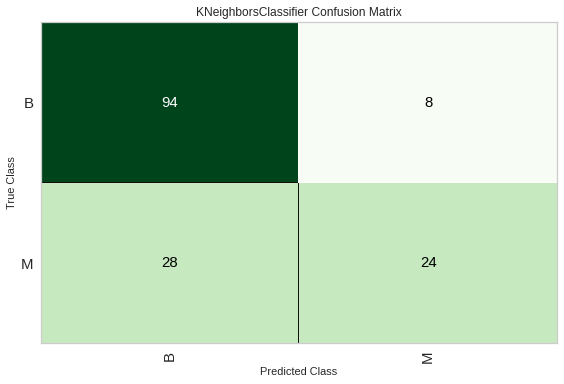

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(tuned_knn, plot = 'confusion_matrix')

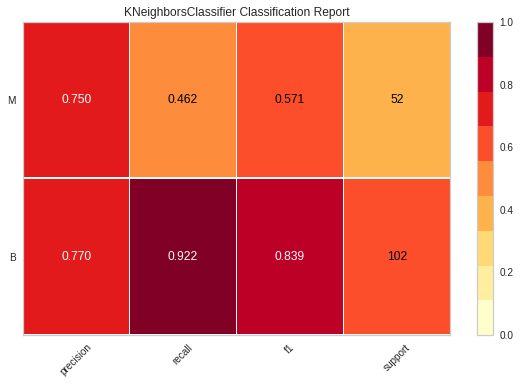

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
plot_model(tuned_knn, plot = 'class_report')

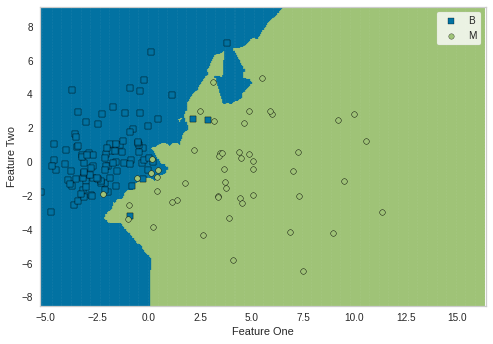

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(tuned_knn, plot='boundary')

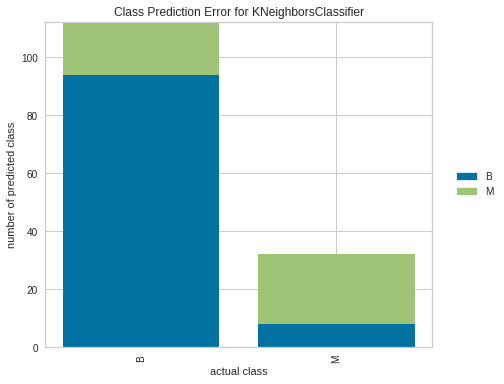

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(tuned_knn, plot = 'error')

In [21]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7662,0.7417,0.4615,0.75,0.5714,0.423,0.4465


In [23]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_ta

In [24]:
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')


In [25]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0,0.849,0,0,0,0,0


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label,Score
0,84348301,M,11.420,20.38,77.58,386.1,0.1425,0.28390,0.24140,0.105200,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,M,1.0
1,843786,M,12.450,15.70,82.57,477.1,0.1278,0.17000,0.15780,0.080890,...,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,M,1.0
2,84862001,M,16.130,20.68,108.10,798.8,0.1170,0.20220,0.17220,0.102800,...,136.80,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420,M,1.0
3,85713702,B,8.196,16.84,51.71,201.9,0.0860,0.05943,0.01588,0.005917,...,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,B,0.5
4,857155,B,12.050,14.63,78.04,449.3,0.1031,0.09092,0.06592,0.027490,...,89.88,582.6,0.1494,0.2156,0.3050,0.06548,0.2747,0.08301,B,1.0


In [26]:
save_model(final_knn,'Final KNN Model multiclass')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), model_name=Final KNN Model multiclass, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='diagnosis',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='diagnosis',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('fix_perfect', Remove_100(target='diagnosis')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
      

In [28]:
saved_final_knn = load_model('Final KNN Model multiclass')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model multiclass, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [29]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='diagnosis',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('fix_perfect', Remove_100(target='diagnosis')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
              

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0,0.849,0,0,0,0,0


In [30]:
new_prediction.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label,Score
0,84348301,M,11.420,20.38,77.58,386.1,0.1425,0.28390,0.24140,0.105200,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,M,1.0
1,843786,M,12.450,15.70,82.57,477.1,0.1278,0.17000,0.15780,0.080890,...,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,M,1.0
2,84862001,M,16.130,20.68,108.10,798.8,0.1170,0.20220,0.17220,0.102800,...,136.80,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420,M,1.0
3,85713702,B,8.196,16.84,51.71,201.9,0.0860,0.05943,0.01588,0.005917,...,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,B,0.5
4,857155,B,12.050,14.63,78.04,449.3,0.1031,0.09092,0.06592,0.027490,...,89.88,582.6,0.1494,0.2156,0.3050,0.06548,0.2747,0.08301,B,1.0
